In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import datetime
import pickle
import seaborn as sns

In [2]:
df = pd.read_pickle('weather_ozone')
monthly_corr = pd.read_pickle('monthly_corr_all')

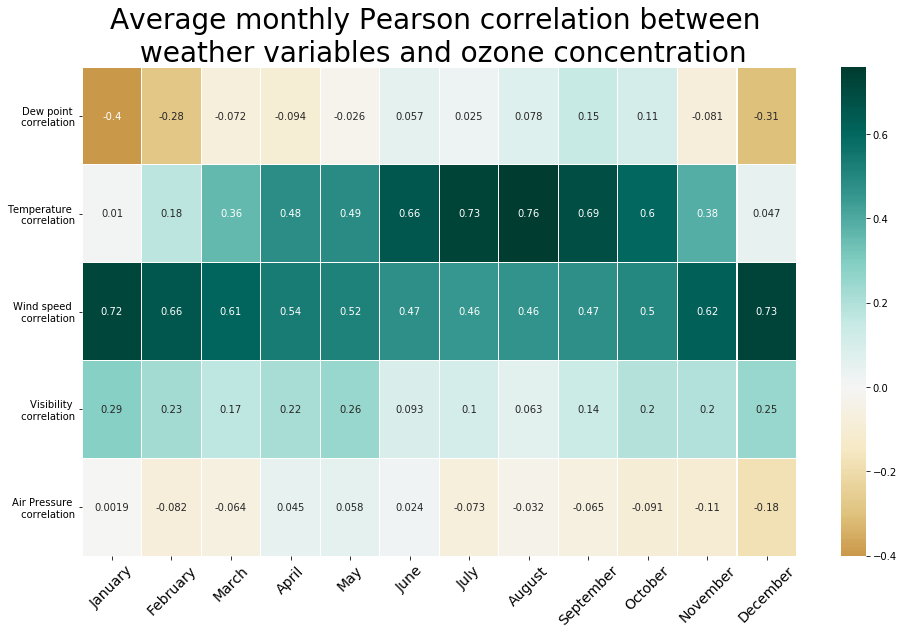

In [3]:
_ = plt.rcParams['figure.figsize'] = [16, 9]
sns.heatmap(monthly_corr.transpose(), annot=True, linewidths=.2, cmap="BrBG", center=0)
plt.title("Average monthly Pearson correlation between \n weather variables and ozone concentration", size=28)
plt.xticks(rotation=45, size=14)
plt.yticks(rotation = 0, size=10)
plt.show()

**A full monthly Pearson correlation heatmap with all of the variables can be seen above, with temperature and wind speed having the highest correlation with ozone concentration, as described in the storytelling portion. The visibility and air pressure were added to the comparison, and were disregarded during the storytelling portion due to their weak correlations. They both have very little relationship with ozone levels during the summer months, while visibility has a moderate relationship with ozone levels in the winter months. Air pressure is a weak variable throughout the year.**

**While the weather variables have various levels of correlation with the ozone concentration, they will be evaluated on a monthly basis to determine the statistical significance of that correlation. The null hypothesis will assume no relationship, and the value of $\alpha$ will be set to 0.01, which means that the null hypothesis can be rejected for p-values that are under 0.01.**

In [4]:
years = sorted(df.index.year.unique())
months = sorted(df.index.month.unique())
month_names = ['January', 'February', 'March', 'April', 'May', 
               'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [5]:
pearson_temp = []
for mo in months:
        pearson_temp.append(list(stats.pearsonr(df.loc[df.index.month==mo, 'TEMP'], 
                                                df.loc[df.index.month==mo, 'ozone_ppm'])))
pearson_temp = np.array(pearson_temp)

pearson_dewp = []
for mo in months:
        pearson_dewp.append(list(stats.pearsonr(df.loc[df.index.month==mo, 'DEWP'], 
                                                df.loc[df.index.month==mo, 'ozone_ppm'])))
pearson_dewp = np.array(pearson_dewp)

pearson_spd = []
for mo in months:
        pearson_spd.append(list(stats.pearsonr(df.loc[df.index.month==mo, 'SPD'], 
                                                df.loc[df.index.month==mo, 'ozone_ppm'])))
pearson_spd = np.array(pearson_spd)

pearson_vsb = []
for mo in months:
        pearson_vsb.append(list(stats.pearsonr(df.loc[df.index.month==mo, 'VSB'], 
                                                df.loc[df.index.month==mo, 'ozone_ppm'])))
pearson_vsb = np.array(pearson_vsb)

pearson_stp = []
for mo in months:
        pearson_stp.append(list(stats.pearsonr(df.loc[df.index.month==mo, 'STP'], 
                                                df.loc[df.index.month==mo, 'ozone_ppm'])))
pearson_stp = np.array(pearson_stp)



In [6]:
pearson_tests = pd.DataFrame(data = {'Temperature':pearson_temp[:,1], 
                                     'Dew \n Point':pearson_dewp[:,1],
                                     'Wind \n Speed':pearson_spd[:,1],
                                    'Visibility':pearson_vsb[:,1],
                                    'Air \n Pressure':pearson_stp[:,1]}, index = month_names)

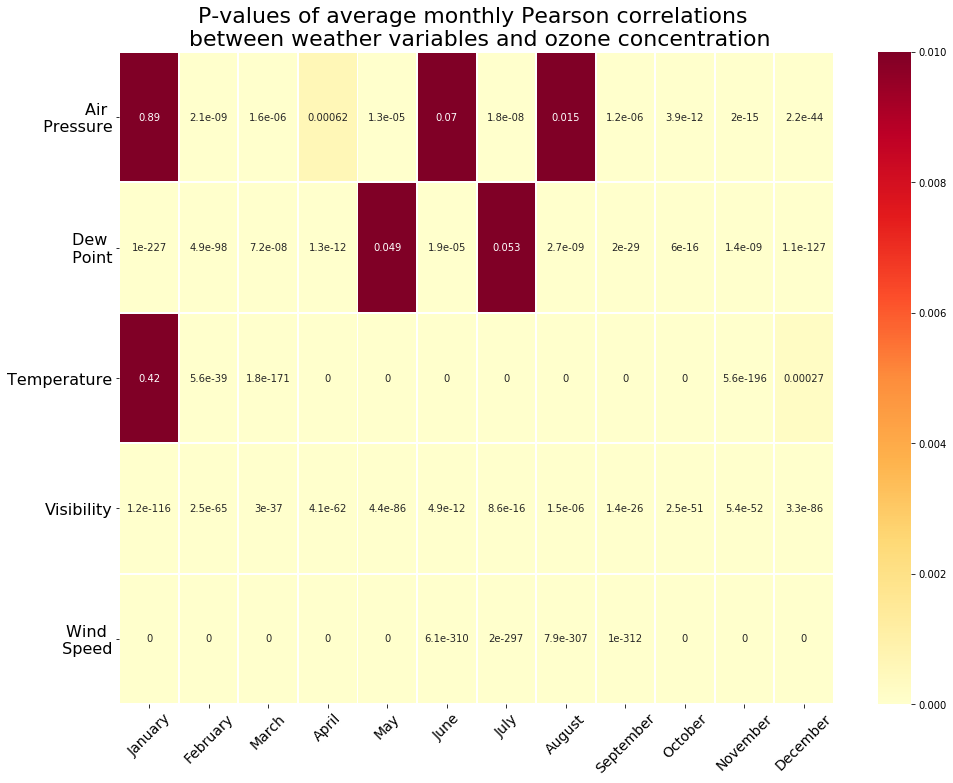

In [7]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(pearson_tests.transpose(), annot=True, linewidths=1, cmap="YlOrRd", vmax=0.01)
plt.title("P-values of average monthly Pearson correlations \n between weather variables and ozone concentration", 
          size=22)
plt.xticks(rotation=45, size=14)
plt.yticks(rotation=0, size=16)
plt.show()

**The p-values for the Pearson correlations of each of the variables with ozone concentration can be seen in the heatmap above. For all the values under 0.01, the null hypothesis can be rejected, and a statistically significant relationship exists between the relevant variable and ozone concentration for the given month.**

**For the vast majority of values, a statistically significant relationship exists with the ozone levels, and the null hypothesis can be rejected. This includes values that are associated with very low correlations, and illustrates the difference between statistical significance and *practical* significance. Only the months shaded in a dark maroon color have a p-value above 0.01 where the null is not rejected. **

**One possible reason for the discrepancy between statistical significance and practical significance is the large size of this dataset. With tens of thousands of values, a statistically significant model can be constructed even if it has very low predictability. **